In [ ]:
"""
MFM - Text Analytics using Topic Modelling
by Akbar Delmi

Reference :
  https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
  https://towardsdatascience.com/topic-modeling-with-gensim-a5609cefccc
  https://medium.com/analytics-vidhya/latent-dirichlet-allocation-and-topic-modelling-eea49dc3eea6
"""

'\nMFM - Text Analytics using Topic Modelling\nby Akbar Delmi\n\nReference :\n  https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/\n  https://towardsdatascience.com/topic-modeling-with-gensim-a5609cefccc\n  https://medium.com/analytics-vidhya/latent-dirichlet-allocation-and-topic-modelling-eea49dc3eea6\n'

In [ ]:
!pip install --upgrade pandas==1.2 #pandas spesifik 1.2 hanya untuk membantu visualisasi di pyLDAvis
import pandas as pd
from tqdm.notebook import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
'''Dataset artikel berita bahasa Indonesia, referensi sumber data berasal dari https://github.com/feryandi/Dataset-Artikel'''
#df = pd.read_csv("dataset.csv")
df_raw = pd.read_csv("drive/MyDrive/dataset_mfm/dataset.csv")

In [ ]:
df_raw.shape

(8000, 8)

In [ ]:
print(df_raw.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'item_id', 'url', 'title', 'content_html',
       'published_at', 'source'],
      dtype='object')


In [ ]:
df = df_raw.sample(n=3000, random_state=54)

In [ ]:
df.content_html.iloc[0]

'<p><strong>TEMPO.CO</strong>, <strong>Denpasar</strong>\xa0- Untuk mempermudah pembinaan para napi dan tahanan di Lembaga Pemasyarakatan Kerobokan, Denpasar, Kepala Lapas Tony Nainggolan meluncurkan organisasi yang diberi nama Komunitas Anak Terali Besi alias Antrabes. Komunitas ini juga berisi para mantan warga binaan serta tokoh masyarakat yang bersedia menjadi pembimbing.</p><p>“Antrabes ini diharapkan mengganti sebutan mantan napi yang menjadi beban setelah keluar Lapas,” kata Tony, Rabu, 4 Januari 2017. </p><p>Komunitas ini sebenarnya bermula dari kegiatan warga binaan khususnya yang masih muda untuk membuat workshop dan pelatihan seperti menari, videografi, serta latihan bermusik. Tak dinyana, satu grup band telah dilahirkan dan kemudian membuat 1 album musik yang telah diluncurkan.</p><p>Grup bernama Antrabes itu juga telah diundang di berbagai event dan video mereka yang diunggah di YouTube telah ditonton ribuan orang. “Dari situ saya berpikir kenapa tidak dikembangkan lebih l

In [ ]:
from bs4 import BeautifulSoup

def clean_html(html_text):
    soup = BeautifulSoup(html_text)
    text = soup.get_text()
    return text

tqdm.pandas(desc="remove html")
df['content'] = df['content_html'].progress_apply(lambda x: clean_html(x))

remove html:   0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
df.content.iloc[0]

'TEMPO.CO, Denpasar\xa0- Untuk mempermudah pembinaan para napi dan tahanan di Lembaga Pemasyarakatan Kerobokan, Denpasar, Kepala Lapas Tony Nainggolan meluncurkan organisasi yang diberi nama Komunitas Anak Terali Besi alias Antrabes. Komunitas ini juga berisi para mantan warga binaan serta tokoh masyarakat yang bersedia menjadi pembimbing.“Antrabes ini diharapkan mengganti sebutan mantan napi yang menjadi beban setelah keluar Lapas,” kata Tony, Rabu, 4 Januari 2017. Komunitas ini sebenarnya bermula dari kegiatan warga binaan khususnya yang masih muda untuk membuat workshop dan pelatihan seperti menari, videografi, serta latihan bermusik. Tak dinyana, satu grup band telah dilahirkan dan kemudian membuat 1 album musik yang telah diluncurkan.Grup bernama Antrabes itu juga telah diundang di berbagai event dan video mereka yang diunggah di YouTube telah ditonton ribuan orang. “Dari situ saya berpikir kenapa tidak dikembangkan lebih luas lagi,” kata Nainggolan. Komunitas juga untuk menghinda

In [ ]:
#remove null value
df = df[df["content"]!=""]
print(df.shape)

(2999, 9)


In [ ]:
!pip install gensim
import nltk
import string
import re

from nltk.corpus import stopwords
from html import unescape

from gensim.models.phrases import Phraser,Phrases

nltk.download('stopwords')
nltk.download('punkt')
list_stopwords = set(stopwords.words('indonesian'))

#cleanse data
def cleanse(text):
    text = unescape(text)
    text = re.sub(r"\b\d{1,3}\b", ".", text)
    text = re.sub(r"\b[a-zA-Z]\b", ".", text)
    text = re.sub(r"liputan6", "", text)
    text = re.sub(r"tribunnews.com", "", text)
    text = re.sub(r"detik.com", "", text)
    text = re.sub(r"kompas.com", "", text)
    text = re.sub(r"tempo.co", "", text)
    text = re.sub(r"com", "", text)
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    return ' '.join(text.split())

#remove stopword
def remove_stopword(sentence):
    return " ".join([x.strip(".',!?-<>") for x in sentence.split() if x not in list_stopwords])

#word tokenizing
def tokenize(sentence):
    return [token for token in sentence.split() if token not in list_stopwords]

#bigram applied on sentences
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

def sentences_to_bi_grams(n_grams, sentences):
    parsed_sentence = []
    for sentence in sentences:
        tokenized_sentence = tokenize(sentence)
        stbg = sentence_to_bi_grams(n_grams, tokenized_sentence)
        if stbg != "":
            parsed_sentence.append(stbg)
    try:
        return parsed_sentence[0]
    except(IndexError):
        print(sentences)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Bigram create model
content = ""
for value in tqdm(df.content.values.tolist()):
    content = content + " " + value.lower()
sentences = nltk.sent_tokenize(content)
tkn = [tokenize(cleanse(sentence)) for sentence in sentences if tokenize(sentence) is not '']
phrases = Phrases(tkn, min_count=15,threshold =100)
bigram = Phraser(phrases)

<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?


  0%|          | 0/2999 [00:00<?, ?it/s]

<ipython-input-13-0c112c13b1fe>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  tkn = [tokenize(cleanse(sentence)) for sentence in sentences if tokenize(sentence) is not '']


In [ ]:
# Remove punctuation
tqdm.pandas(desc="stopword remover")
df['content'] = df['content'].progress_apply(lambda x: remove_stopword(x))
# Convert the titles to lowercase
tqdm.pandas(desc="to lowercase")
df['content'] = df['content'].progress_apply(lambda x: x.lower())
tqdm.pandas(desc="cleanse")
df['content'] = df['content'].progress_apply(lambda x: cleanse(x))
tqdm.pandas(desc="word n-gram")
df['content'] = df['content'].progress_apply(lambda x: sentences_to_bi_grams(bigram, [x]))

stopword remover:   0%|          | 0/2999 [00:00<?, ?it/s]

to lowercase:   0%|          | 0/2999 [00:00<?, ?it/s]

cleanse:   0%|          | 0/2999 [00:00<?, ?it/s]

word n-gram:   0%|          | 0/2999 [00:00<?, ?it/s]

In [ ]:
content = ""
for value in tqdm(df.content.values.tolist()):
    content = content + " " + value.lower()
sentences = nltk.sent_tokenize(content)
tkn = [tokenize(sentence) for sentence in sentences if tokenize(sentence) is not '']
phrases2 = Phrases(tkn, min_count=30,threshold =100)
bigram2 = Phraser(phrases2)

tqdm.pandas(desc="word n-gram 2")
df['content'] = df['content'].progress_apply(lambda x: sentences_to_bi_grams(bigram2, [x]))

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?


  0%|          | 0/2999 [00:00<?, ?it/s]

<ipython-input-15-aae1ca74d46d>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  tkn = [tokenize(sentence) for sentence in sentences if tokenize(sentence) is not '']


word n-gram 2:   0%|          | 0/2999 [00:00<?, ?it/s]

In [ ]:
df.content.iloc[0]

'denpasar mempermudah pembinaan napi tahanan lembaga pemasyarakatan kerobokan denpasar kepala lapas tony nainggolan meluncurkan organisasi nama komunitas anak terali besi alias antrabes komunitas berisi mantan warga binaan tokoh masyarakat bersedia pembimbing “antrabes diharapkan mengganti sebutan mantan napi beban lapas ” tony rabu januari 2017 komunitas kegiatan warga binaan muda workshop pelatihan menari videografi latihan bermusik dinyana grup band dilahirkan album musik diluncurkan grup bernama antrabes diundang event video diunggah youtube ditonton ribuan orang “dari situ berpikir dikembangkan luas ” nainggolan komunitas menghindari keterputusan napi habis penahananannya aktif kegiatan lapas ketua antrabes made putu leong komunitas berusaha menghilangkan kesan lapas kerobokan menyeramkan “di belajar bertekad berubah ” leong lapas dihuni orang kegiatan konkret diwadahi sanggar kesenian “semeton” sanggar pramuka klub olahraga aneka workshop wirausaha videografer erick est anggota k

In [ ]:
df.content.iloc[1]

'laporan_wartawan dennis destryawan jakarta basuki_tjahaja_purnama blak blakan respon keluarganya menjeratnya dugaan_penodaan_agama pria_akrab_disapa ahok kepercayaan ditanamkan keluarganya merespon menjeratnya keluarga kebaikan tuhan umatnya keluarga niatan buruk ahok keluarga rancang jahat tuhan ubah kebaikan percaya percaya ahok blusukannya cililitan jakarta timur rabu 2016 ucapan ahok kepulauan_seribu september akar permasalahan penodaan_agama ahok niatannya melukai umat_islam politisi menyitir ayat kepentingan politik niat takut mutiara buang kubangan mutiara he he ahok dianggap cobaan mesti dilaluinya pria kelahiran belitung timur pohon lurus menebang mengerti pohon lurus nebang ahok anak sulungnya nicholas sean purnama menceritakan perasaannya ayahnya tersangka nicholas kaget menanggapi santai ahok bersalah nicho perhatian ayahnya sebisa nicho menyempatkan menghubungi ahok mengaku jarang rumah kuliah mengirimkan pesan_singkat ahok nicho berharap ayahnya kuat menjalani hukum berh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


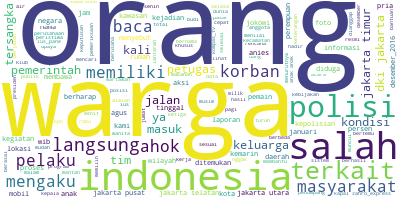

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud # wordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


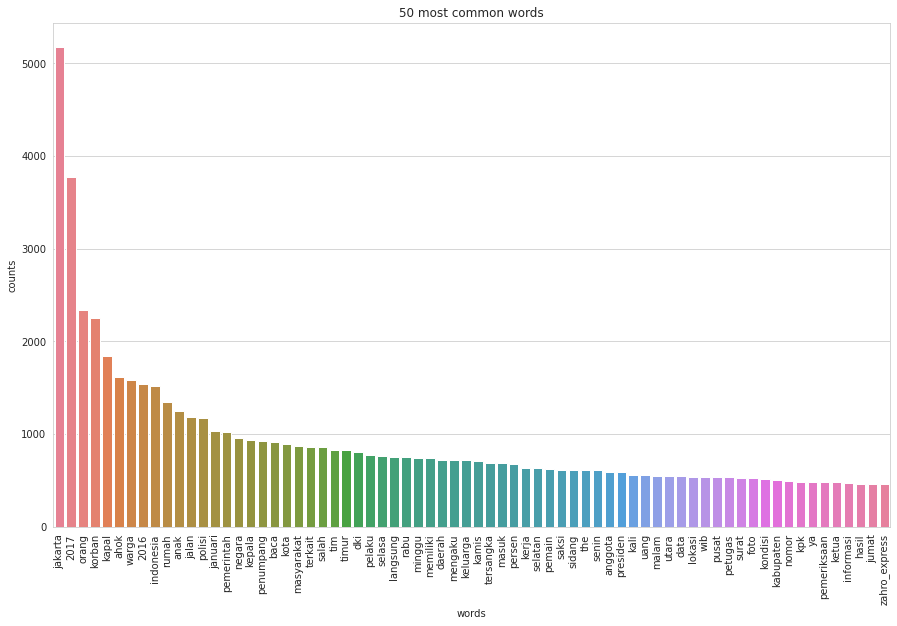

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load the library with the CountVectorizer method
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:70]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='50 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=list_stopwords)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['content'])
# Visualise the 10 most common words
plot_50_most_common_words(count_data, count_vectorizer)

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
from gensim.utils import tokenize as gtokenize
from gensim.utils import simple_preprocess

from pprint import pprint

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))  # deacc=True removes punctuations


#to list and tokenize the sentence
list_of_sentence = df.content.values.tolist()

data_words = list(sent_to_words(list_of_sentence))
print(data_words[:1])

[['denpasar', 'mempermudah', 'pembinaan', 'napi', 'tahanan', 'lembaga', 'pemasyarakatan', 'kerobokan', 'denpasar', 'kepala', 'lapas', 'tony', 'nainggolan', 'meluncurkan', 'organisasi', 'nama', 'komunitas', 'anak', 'terali', 'besi', 'alias', 'antrabes', 'komunitas', 'berisi', 'mantan', 'warga', 'binaan', 'tokoh', 'masyarakat', 'bersedia', 'pembimbing', 'antrabes', 'diharapkan', 'mengganti', 'sebutan', 'mantan', 'napi', 'beban', 'lapas', 'tony', 'rabu', 'januari', 'komunitas', 'kegiatan', 'warga', 'binaan', 'muda', 'workshop', 'pelatihan', 'menari', 'videografi', 'latihan', 'bermusik', 'dinyana', 'grup', 'band', 'dilahirkan', 'album', 'musik', 'diluncurkan', 'grup', 'bernama', 'antrabes', 'diundang', 'event', 'video', 'diunggah', 'youtube', 'ditonton', 'ribuan', 'orang', 'dari', 'situ', 'berpikir', 'dikembangkan', 'luas', 'nainggolan', 'komunitas', 'menghindari', 'keterputusan', 'napi', 'habis', 'penahananannya', 'aktif', 'kegiatan', 'lapas', 'ketua', 'antrabes', 'made', 'putu', 'leong',

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Find best cluster amount
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,random_state=53, alpha='auto', eval_every=5) 
        #model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=53,workers=60)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# plotting the graph
%matplotlib inline

start=2
limit=20
step=1
model_list=None
coherence_values=None
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=start, limit=limit, step=step)

  0%|          | 0/18 [00:00<?, ?it/s]

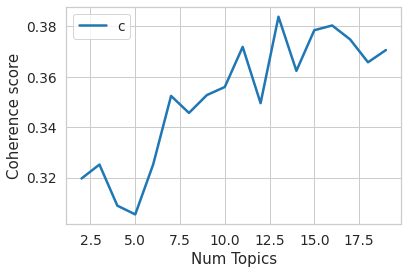

In [ ]:
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
highest_coherence_values = 0

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))
    
    if highest_coherence_values<cv:
        highest_coherence_values=cv
        choosen_num_topics = m

Num Topics = 2  has Coherence Value of 0.3196573635
Num Topics = 3  has Coherence Value of 0.3251799714
Num Topics = 4  has Coherence Value of 0.308870374
Num Topics = 5  has Coherence Value of 0.3054027431
Num Topics = 6  has Coherence Value of 0.3252075722
Num Topics = 7  has Coherence Value of 0.3524128021
Num Topics = 8  has Coherence Value of 0.3456671295
Num Topics = 9  has Coherence Value of 0.3527496882
Num Topics = 10  has Coherence Value of 0.3559485721
Num Topics = 11  has Coherence Value of 0.3718671606
Num Topics = 12  has Coherence Value of 0.3495445706
Num Topics = 13  has Coherence Value of 0.3838228131
Num Topics = 14  has Coherence Value of 0.362362816
Num Topics = 15  has Coherence Value of 0.3784776968
Num Topics = 16  has Coherence Value of 0.3803531402
Num Topics = 17  has Coherence Value of 0.374837454
Num Topics = 18  has Coherence Value of 0.3657601355
Num Topics = 19  has Coherence Value of 0.3706037436
Num Topics = 20  has Coherence Value of 0.3564752027
Num 

In [ ]:
num_topics = 7 
optimal_model = model_list[num_topics-2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.019*"jakarta" + 0.008*"warga" + 0.007*"kapal" + 0.007*"orang" + '
  '0.005*"pemerintah" + 0.004*"anak" + 0.004*"dki" + 0.004*"masyarakat" + '
  '0.004*"rumah" + 0.004*"indonesia" + 0.004*"baca" + 0.003*"negara" + '
  '0.003*"korban" + 0.003*"ahok" + 0.003*"penumpang" + 0.002*"sumarsono" + '
  '0.002*"kota" + 0.002*"ketua" + 0.002*"mengaku" + 0.002*"salah" + '
  '0.002*"kerja" + 0.002*"terkait" + 0.002*"memiliki" + 0.002*"jalan" + '
  '0.002*"kepala"'),
 (1,
  '0.010*"jakarta" + 0.007*"anak" + 0.006*"orang" + 0.003*"the" + '
  '0.003*"korban" + 0.003*"rumah" + 0.003*"jalan" + 0.003*"pelaku" + '
  '0.003*"ahok" + 0.003*"keluarga" + 0.003*"jokowi" + 0.002*"video" + '
  '0.002*"januari" + 0.002*"timur" + 0.002*"selasa" + 0.002*"dodi" + '
  '0.002*"polisi" + 0.002*"salah" + 0.002*"negara" + 0.002*"tewas" + '
  '0.002*"penjara" + 0.002*"langsung" + 0.002*"foto" + 0.002*"mengaku" + '
  '0.002*"rabu"'),
 (2,
  '0.008*"indonesia" + 0.007*"pemain" + 0.006*"jakarta" + 0.006*"persen" + '

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(optimal_model, corpus, list_of_sentence)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(30)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.5120,"jakarta, warga, kapal, orang, pemerintah, anak...",denpasar mempermudah pembinaan napi tahanan le...
1,1,1.0,0.3654,"jakarta, anak, orang, the, korban, rumah, jala...",laporan_wartawan dennis destryawan jakarta bas...
2,2,1.0,0.9876,"jakarta, anak, orang, the, korban, rumah, jala...",jakarta – penyanyi bintang film marshanda menc...
3,3,3.0,0.9828,"jakarta, indonesia, jalan, negara, masyarakat,...",jakarta kadiv humas mabes_polri irjen_pol boy_...
4,4,6.0,0.5945,"ahok, jakarta, sidang, rumah, saksi, warga, po...",tribunnews ruth vania new_york jelang pelantik...
5,5,6.0,0.3262,"ahok, jakarta, sidang, rumah, saksi, warga, po...",bandung wali_kota bandung ridwan_kamil menutup...
6,6,1.0,0.9944,"jakarta, anak, orang, the, korban, rumah, jala...",jakarta the state electricity pany pln decided...
7,7,2.0,0.5239,"indonesia, pemain, jakarta, persen, harga, jan...",lisbon dilaporkan bergabung manchester_united ...
8,8,3.0,0.7281,"jakarta, indonesia, jalan, negara, masyarakat,...",laporan_wartawan zulfikar jakarta ‎ ‎kebebasan...
9,9,2.0,0.9748,"indonesia, pemain, jakarta, persen, harga, jan...",jakarta gempa berkekuatan skala richter sr mal...


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(25)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9971,"jakarta, warga, kapal, orang, pemerintah, anak...",jakarta ketua lembaga perlindungan anak lpa in...
1,1.0,0.9980,"jakarta, anak, orang, the, korban, rumah, jala...",jakarta jakarta governor candidate anies_baswe...
2,2.0,0.9966,"indonesia, pemain, jakarta, persen, harga, jan...",jakarta penyerang tim nasional indonesia ketur...
3,3.0,0.9971,"jakarta, indonesia, jalan, negara, masyarakat,...",artis cantik prilly latuconsina pasrah raditya...
4,4.0,0.9985,"jakarta, indonesia, korban, orang, warga, aust...",jakarta • pendapatan 2017 reksa dananilaihasil...
5,5.0,0.9979,"korban, jakarta, kapal, orang, penumpang, poli...",medan tersangka dugaan perampokan menyebabkan ...
6,6.0,0.9988,"ahok, jakarta, sidang, rumah, saksi, warga, po...",jakarta sidang dugaan_penistaan agama_terdakwa...


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"jakarta, warga, kapal, orang, pemerintah, anak...",527,0.1757
1.0,1.0,"jakarta, anak, orang, the, korban, rumah, jala...",342,0.1140
2.0,2.0,"indonesia, pemain, jakarta, persen, harga, jan...",384,0.1280
3.0,3.0,"jakarta, indonesia, jalan, negara, masyarakat,...",383,0.1277
4.0,4.0,"jakarta, indonesia, korban, orang, warga, aust...",313,0.1044
5.0,5.0,"korban, jakarta, kapal, orang, penumpang, poli...",634,0.2114
6.0,6.0,"ahok, jakarta, sidang, rumah, saksi, warga, po...",416,0.1387


In [ ]:
!pip install pyLDAvis
import pyLDAvis
from pyLDAvis.gensim_models import prepare as gprepare

pyLDAvis.enable_notebook()
vis = gprepare(optimal_model, corpus, id2word)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.073015  0.061402       1        1  19.543466
0     -0.000064  0.034048       2        1  17.658453
6     -0.065437 -0.085028       3        1  13.894692
3      0.045255 -0.022064       4        1  13.040062
1     -0.021693  0.006815       5        1  12.374969
2      0.114765  0.000584       6        1  11.979360
4      0.000190  0.004243       7        1  11.508999, topic_info=         Term         Freq        Total Category  logprob  loglift
114      ahok  1452.000000  1452.000000  Default  30.0000  30.0000
1593   korban  2139.000000  2139.000000  Default  29.0000  29.0000
1111   sidang   578.000000   578.000000  Default  28.0000  28.0000
895     kapal  1709.000000  1709.000000  Default  27.0000  27.0000
543    pemain   589.000000   589.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
676      baca    84.140992   903.303323   Topic7  -6.3265  -0.2115
1069      dki    78.369513   757.894611   Topic7  -6.3976  -0.1071
1006    surat    70.859047   456.389417   Topic7  -6.4983   0.2994
895     kapal    75.457725  1709.871154   Topic7  -6.4354  -0.9586
159   mengaku    72.122345   696.533840   Topic7  -6.4807  -0.1057

[641 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1177       1  0.031747     abal
1177       2  0.952413     abal
23577      2  0.176925      ace
23577      3  0.739870      ace
23577      5  0.016084      ace
...      ...       ...      ...
11935      2  0.860268     zero
11935      4  0.053767     zero
11935      5  0.053767     zero
29702      1  0.941713  zubaidi
19963      6  0.823138   zurich

[2123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 7, 4, 2, 3, 5])